In [15]:
# Basic imports
import os
master_dir = os.getcwd()  # the main working directory
data_dir   = os.path.join(master_dir, "Data")  # sub directory where we save data files
import csv
import time
import numpy as np
import pandas as pd
import scipy.io
import pickle
from typing import Callable, Any
import matplotlib.pyplot as plt
# plt.rcParams['figure.dpi'] = 300
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.figsize'] = (10, 5)

# Approximating a sine wave

In [141]:
fs=15

In [178]:
# Import the data for comparison
df = pd.read_csv(os.path.join(data_dir, "sine_results_no_noise.csv"))
df_n    = pd.read_csv(os.path.join(data_dir, "sine_results_noise.csv"))
# Show an example
df.head(3)

,Hidden,Algorithm,Iterations,Training Time,Train MSE,Test MSE,Noise
0,10,traingd,10,0.046623,1.040698,0.794954,0
1,10,traingd,10,0.028687,1.972382,1.763702,0
2,10,traingd,10,0.023026,1.267159,1.820413,0


In [179]:
algorithms = df["Algorithm"].unique()
xlabels = algorithms
print(xlabels)
colors = ["blue", "orange", "red", "green", "purple"]
xlabels = ["GD", "LM", "CGF", "BFG", "BR"]

['traingd' 'trainlm' 'traincgf' 'trainbfg' 'trainbr']


## Training time

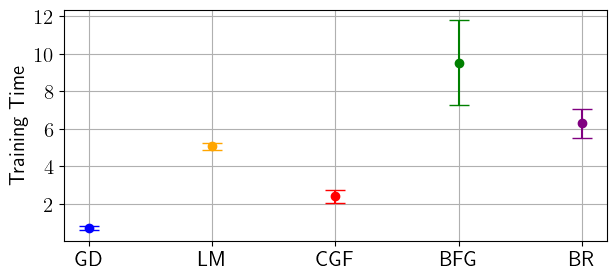

In [180]:
plt.figure(figsize=(7,3))
# Define the plot parameters for the loop
key = "Training Time"

# Save data of each algorithm and for both pure and noisy data
this_df = df_n[(df_n["Iterations"] == np.max(df_n["Iterations"])) & (df_n["Hidden"] == np.max(df_n["Hidden"]))]
this_df = df[(df["Iterations"] == np.max(df["Iterations"])) & (df["Hidden"] == np.max(df["Hidden"]))]
mu = []
sigma = []
for i, alg in enumerate(algorithms):
    data = this_df[this_df["Algorithm"]     == alg][key]
    # Make plot
    plt.errorbar(i, np.mean(data), yerr=np.std(data), fmt = 'o', capsize = 7, color = colors[i])

# Set the x-axis tick labels and the axis label
plt.xticks(xticks, xlabels, fontsize=fs)

# Set the y-axis label
plt.ylabel(key, fontsize=fs)
# plt.yscale('log')
plt.grid()
plt.yticks(fontsize=fs)
plt.savefig("Plots/ex1_sine_training_time_final.pdf", bbox_inches='tight')
plt.show()

## MSE

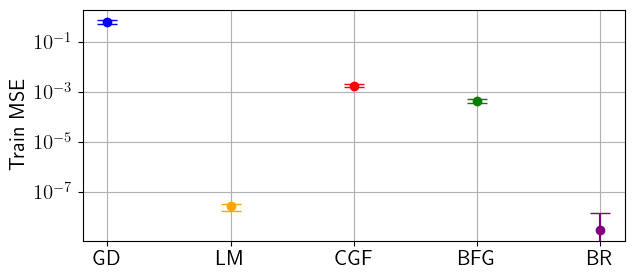

In [181]:
plt.figure(figsize=(7,3))
# Define the plot parameters for the loop
key = "Train MSE"

# Save data of each algorithm and for both pure and noisy data
this_df = df[(df["Iterations"] == np.max(df["Iterations"])) & (df["Hidden"] == np.max(df["Hidden"]))]
mu = []
sigma = []
for i, alg in enumerate(algorithms):
    data = this_df[this_df["Algorithm"]     == alg][key]
    # Make plot
    plt.errorbar(i, np.mean(data), yerr=np.std(data), fmt = 'o', capsize = 7, color = colors[i])

# Set the x-axis tick labels and the axis label
plt.xticks(xticks, xlabels, fontsize=fs)

# Set the y-axis label
plt.ylabel(key, fontsize=fs)
plt.yscale('log')
plt.yticks(fontsize=fs)
plt.grid()
plt.savefig("Plots/ex1_sine_train_MSE_final.pdf", bbox_inches='tight')
plt.show()

## Generalization over hidden size 

In [182]:
# Switch data
df = pd.read_csv(os.path.join(data_dir, "generalization_no_noise.csv"))
df_n = pd.read_csv(os.path.join(data_dir, "generalization_noise.csv"))
# Show an example
df.head(3)

,Hidden,Algorithm,Iterations,Training Time,Train MSE,Test MSE,Noise
0,5,traingd,300,0.110766,0.488012,0.483779,0
1,5,trainlm,300,0.247503,0.286517,0.234527,0
2,5,traincgf,300,0.294276,0.362738,0.364139,0


In [183]:
hidden_list = df["Hidden"].unique()
hidden_list

array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100], dtype=int64)

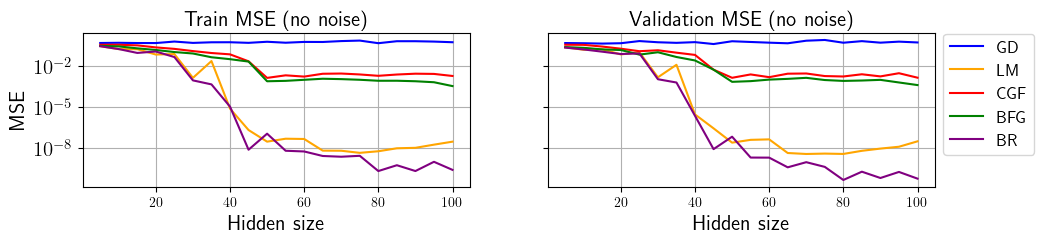

In [192]:
plt.subplots(nrows=1, ncols=2, figsize=(11,2), sharey=True)

for a, key in enumerate(["Train MSE", "Test MSE"]):
    if a == 0:
        plt.subplot(121)
        plt.ylabel("MSE", fontsize=fs)
        plt.title("Train MSE  (no noise)", fontsize=fs)
    else:
        plt.subplot(122)
        plt.title("Validation MSE  (no noise)", fontsize=fs)
    for i, alg in enumerate(algorithms):
        train_vals = df[df["Algorithm"] == alg][key]
        plt.plot(hidden_list, train_vals, '-', color = colors[i], label = xlabels[i])
        plt.yscale('log')
        plt.yticks(fontsize=fs)
        plt.grid()
        plt.xlabel("Hidden size", fontsize = fs)

plt.legend(fontsize=fs-3, bbox_to_anchor=(1.00, 1.05))
plt.savefig("Plots/ex1_sine_generalization.pdf", bbox_inches='tight')
plt.show()

Now, with noise

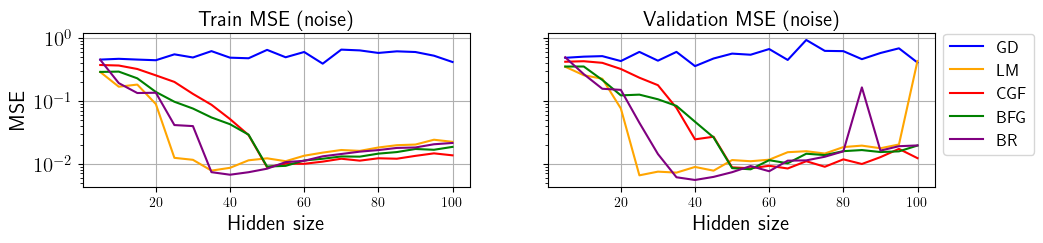

In [191]:
plt.subplots(nrows=1, ncols=2, figsize=(11,2), sharey=True)

for a, key in enumerate(["Train MSE", "Test MSE"]):
    if a == 0:
        plt.subplot(121)
        plt.ylabel("MSE", fontsize=fs)
        plt.title("Train MSE  (noise)", fontsize=fs)
    else:
        plt.subplot(122)
        plt.title("Validation MSE  (noise)", fontsize=fs)
    for i, alg in enumerate(algorithms):
        train_vals = df_n[df_n["Algorithm"] == alg][key]
        plt.plot(hidden_list, train_vals, '-', color = colors[i], label = xlabels[i])
        plt.yscale('log')
        plt.yticks(fontsize=fs)
        plt.grid()
        plt.xlabel("Hidden size", fontsize = fs)

plt.legend(fontsize=fs-3, bbox_to_anchor=(1.00, 1.05))
plt.savefig("Plots/ex1_sine_generalization_noise.pdf", bbox_inches='tight')
plt.show()

# Personal regression problem

In [255]:
# # Read in ALL the data and save appropriate variables
# df   = pd.read_csv(os.path.join(data_dir, "my_data.csv"), names=["X1", "X2", "Tnew"])
# X1   = df["X1"]
# X2   = df["X2"]
# Tnew = df["Tnew"]

Read in our samples of the final prediction after tuning

In [271]:
train_input = np.loadtxt("Data/personal_train_input.txt", delimiter=",")
train_target = np.loadtxt("Data/personal_train_target.txt", delimiter=",")
test_input = np.loadtxt("Data/personal_test_input.txt", delimiter=",")
test_target = np.loadtxt("Data/personal_test_target.txt", delimiter=",")
preds = np.loadtxt("Data/personal_test_preds.txt", delimiter=",")

In [297]:
X1, X2 = train_input
Tnew = train_target
Tnew.shape

(1400,)

Plot

In [298]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

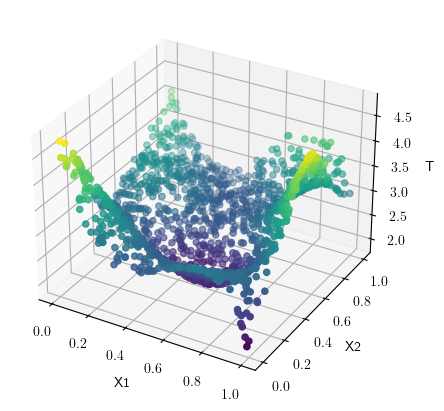

In [299]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Tnew, c=Tnew)

# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('T')

# Show the plot
plt.show()

Now, with an interpolant:

In [300]:
from scipy.interpolate import Rbf

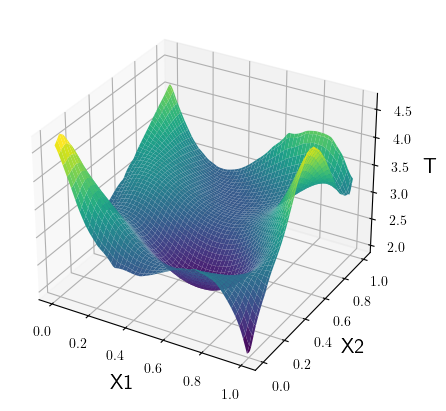

In [301]:
# Define a grid of X1 and X2 values
xi = np.linspace(X1.min(), X1.max(), 100)
yi = np.linspace(X2.min(), X2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Use Rbf to create an interpolant function
rbf = Rbf(X1, X2, Tnew, function='linear')
zi = rbf(xi, yi)

# Create a 3D plot of the smoothed surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xi, yi, zi, cmap='viridis', alpha=1)
# Set labels for the axes
ax.set_xlabel('X1', fontsize=fs)
ax.set_ylabel('X2', fontsize=fs)
ax.set_zlabel('T', fontsize=fs)

# Show the plot
plt.savefig("Plots/personal_train_surface.pdf", bbox_inches = 'tight')
plt.show()

## Performance of the algorithms

In [302]:
import seaborn as sn
from  matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors

my_cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 
my_cmap_r=LinearSegmentedColormap.from_list('rg',["g", "w", "r"], N=256) 

In [303]:
df = pd.read_csv("Data/personal_regression_avg.csv")
mean_df = df.groupby(["Num layers", "Num hidden"]).mean()
mean_df

Train MSE       Val MSE      Test MSE
Num layers Num hidden                                          
1          10          9.714516e-04  1.318995e-03  1.055937e-03
           20          1.244968e-03  1.408897e-03  1.186701e-03
           30          2.137730e-07  2.880650e-07  2.907178e-07
2          10          2.217473e-08  1.700392e-07  6.949050e-08
           20          2.284908e-10  1.152177e-07  9.672499e-08
           30          5.658692e-09  1.220096e-06  4.187449e-07
3          10          3.732027e-09  1.476830e-08  2.355233e-08
           20          2.750842e-08  2.281691e-07  3.778382e-07
           30          2.017138e-08  1.113908e-06  8.764398e-07

In [304]:
mse_values = mean_df["Val MSE"].values
mse_values

array([1.31899476e-03, 1.40889722e-03, 2.88064976e-07, 1.70039225e-07,
       1.15217652e-07, 1.22009628e-06, 1.47683028e-08, 2.28169140e-07,
       1.11390843e-06])

In [305]:
# Reshape into a matrix for plotting
layers_values = np.unique(df["Num layers"].values)
hidden_values = np.unique(df["Num hidden"].values)
mse_values = mse_values.reshape((len(layers_values), len(hidden_values)))

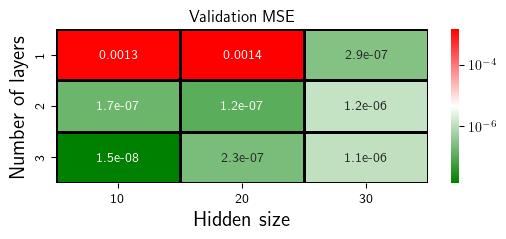

In [306]:
plt.figure(figsize = (6,2))
df_for_plot = pd.DataFrame(mse_values, index = layers_values, columns = hidden_values)
# plt.figure(figsize = (5,3))
sn.heatmap(df_for_plot, annot=True, cmap=my_cmap_r, linewidths=1, linecolor='black', norm=mcolors.LogNorm())
plt.xlabel("Hidden size", fontsize=fs)
plt.ylabel("Number of layers", fontsize=fs)
plt.title("Validation MSE")
plt.savefig("Plots/ex2_gridsearch.pdf", bbox_inches = "tight")
plt.show()

Now, we trained with trainBR. What is the performance and what do the plots show?

In [307]:
df = pd.read_csv("Data/personal_regression_final.csv")
df

,Num layers,Num hidden,Train MSE,Val MSE,Test MSE
0,3,10,3.233583e-09,1.363174e-07,2.587050e-08


## Test set and errors

In [308]:
X1, X2 = test_input
Tnew = test_target
That = preds
That.shape

(1000,)

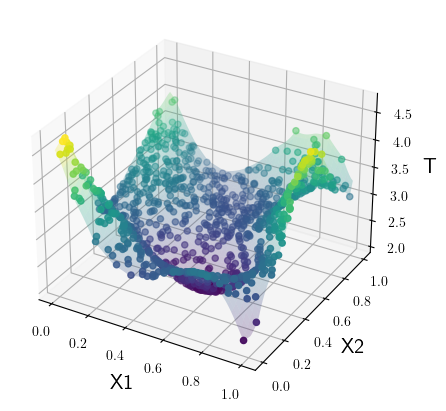

In [311]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a grid of X1 and X2 values
xi = np.linspace(X1.min(), X1.max(), 100)
yi = np.linspace(X2.min(), X2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Use Rbf to create an interpolant function
rbf = Rbf(X1, X2, Tnew, function='linear')
zi = rbf(xi, yi)

# Plot surface
ax.plot_surface(xi, yi, zi, cmap='viridis', alpha=0.25)

# Scatter the predictions
ax.scatter(X1, X2, preds, c=preds)

# Set labels for the axes
ax.set_xlabel('X1', fontsize=fs)
ax.set_ylabel('X2', fontsize=fs)
ax.set_zlabel('T', fontsize=fs)

# Show the plot
plt.savefig("Plots/personal_test_preds.pdf", bbox_inches = 'tight')
plt.show()

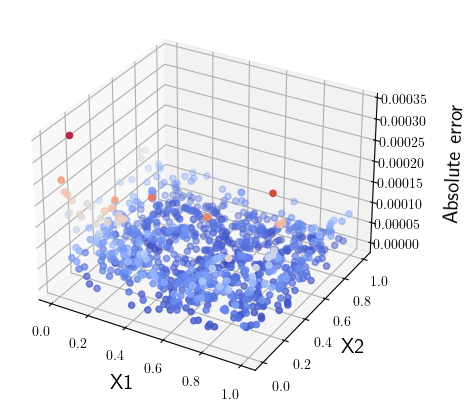

In [329]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X1, X2, abs(Tnew - preds), c=abs(Tnew - preds), cmap='coolwarm')

# Set labels for the axes
ax.set_xlabel('X1', fontsize=fs)
ax.set_ylabel('X2', fontsize=fs)
ax.set_zlabel('Absolute error', fontsize=fs, labelpad = 15)

# Show the plot
plt.savefig("Plots/personal_errors.pdf", bbox_inches='tight')
plt.show()

# Archive

In [ ]:
# fig, axs = plt.subplots(2, 2, figsize=(10,5), sharex=True, sharey=True)
# # Define the plot parameters for the loop
# keys = ["Training Time", "Training Time", "Mean Squared Error", "Mean Squared Error"]
# titles = ["Sine, no noise", "Sine, noise", "Sine, no noise", "Sine, no noise"]
# csv_files = ["training_results_sine.csv", "training_results_sine_noise.csv", "training_results_sine.csv", "training_results_sine_noise.csv"]

# for i in range(len(axs)):
#     ax = axs[i//2, i%2]
#     # Read in the data
#     df = pd.read_csv(os.path.join(data_dir, csv_files[i]))
#     # Save data of each algorithm
#     traingd_data  = df[df["Algorithm"] == "traingd"]
#     trainlm_data  = df[df["Algorithm"] == "trainlm"]
#     trainbfg_data = df[df["Algorithm"] == "trainbfg"]
#     # Get data
#     data1 = traingd_data[keys[i]]
#     data2 = trainlm_data[keys[i]]
#     data3 = trainbfg_data[keys[i]]
#     # Make a boxplot
#     ax.boxplot([data1, data2, data3], positions=[1, 2, 3])
#     # Set the x-axis tick labels and the axis label
#     ax.set_xticks([1, 2, 3], ['GD', 'LM', 'BFG'])

#     # Set the y-axis label
#     ax.set_ylabel('Training time')
#     ax.grid()
#     ax.set_title(titles[i])
# plt.show()

In [ ]:
# plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=False)

# # Look at the OG data first
# df_list = [df[(df["Iterations"] == np.max(df["Iterations"]))], df_n[(df_n["Iterations"] == np.max(df_n["Iterations"]))]]

# for a, this_df in enumerate(df_list):
#     if a == 0:
#         plt.subplot(121)
#     else:
#         plt.subplot(122)
#     for i, alg in enumerate(algorithms):
#         means_train, sigma_train = [], []
#         means_test, sigma_test = [], []
#         data = this_df[this_df["Algorithm"]  == alg]
#         for h in hidden_list:
#             hidden_data = data[data["Hidden"] == h]
#             means_train.append(np.mean(hidden_data["Train MSE"]))
#             sigma_train.append(np.std(hidden_data["Train MSE"]))
#             means_test.append(np.mean(hidden_data["Test MSE"]))
#             sigma_test.append(np.std(hidden_data["Test MSE"]))
#         #plt.errorbar(hidden_list, means_train, yerr=sigma_train, fmt = '-', capsize = 7, color = colors[i], label = alg)
#         #plt.errorbar(hidden_list, means_test, yerr=sigma_test, fmt = '--', capsize = 7, color = colors[i])
#         plt.plot(hidden_list, means_train, '-', color = colors[i], label = alg)
#         plt.plot(hidden_list, means_test, '--', color = colors[i])
#         # Set the y-axis label
#         plt.ylabel("MSE", fontsize=fs)
#         plt.yscale('log')
#         plt.yticks(fontsize=fs)
#         plt.grid()
#         plt.xlabel("Hidden size")

#         plt.savefig("Plots/ex1_sine_generalization.pdf", bbox_inches='tight')
# plt.show()

In [41]:
# fig, axs = plt.subplots(1, 2, figsize=(10,5), sharex=True)

# # Define the plot parameters for the loop
# keys = ["Training Time", "Mean Squared Error"]
# xlabels = ['GD', 'GD, noisy data', 'LM', 'LM, noisy data', 'BFG', 'BFG, noisy data']

# for i, key in enumerate(keys):
#     ax = axs[i]
#     # Save data of each algorithm and for both pure and noisy data
#     data1 = df[df["Algorithm"]     == "traingd"][key]
#     data2 = df_n[df_n["Algorithm"] == "traingd"][key]
    
#     data3 = df[df["Algorithm"]     == "trainlm"][key]
#     data4 = df_n[df_n["Algorithm"] == "trainlm"][key]
    
#     data5 = df[df["Algorithm"]     == "trainbfg"][key]
#     data6 = df_n[df_n["Algorithm"] == "trainbfg"][key]
    
#     # Make a boxplot
#     ax.boxplot([data1, data2, data3, data4, data5, data6], positions=[1, 2, 4, 5, 7, 8])
#     # Set the x-axis tick labels and the axis label
#     ax.set_xticks([1, 2, 4, 5, 7, 8], xlabels)
#     ax.set_xticklabels(xlabels, rotation = 50)

#     # Set the y-axis label
#     ax.set_ylabel(key)
#     ax.grid()
#     # Use log scale for MSE
#     if i == 1:
#         ax.set_yscale('log')
        
# plt.show()